In [44]:
import numpy as np

In [38]:
class Perceptron(object):
  """ 퍼셉트론 분류기
  eta : float
  학습률(0.0과 1.0 사이)

  n_iter : int
  훈련 데이터셋 반복 횟수

  Random_state : int
  가중치 무작위 초기화를 위한 난수 생성기 시드
  """
  # init : eta, 에포크 횟수(n_iter)초기화 -> 객체 초기화
  def __init__(self, eta = 0.01, n_iter=50, random_state =1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X,y):
    rgen = np.random.RandomState(self.random_state) #난수 생성 -> 결과의 재현성
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1+X.shape[1])

    self.errors_=[]
    for _ in range(self.n_iter): #가중치를 초기화 한 후 훈련 세트에 있는 샘플들을 순회하며 가중치 업데이트
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta *(target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)

      self.errors_.append(errors)
    return self

  def net_input(self,X):
    return np.dot(X, self.w_[1:])+self.w_[0] #w^Tx 계산

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0,1,-1) #임계값(0.0)에 따라 1,-1 분류

In [12]:
#붓꽃 데이터셋에서 간단한 퍼셉트론 훈련

In [25]:
import pandas as pd
df = pd.read_csv('iris.data')
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
y = df.iloc[0:100,4].values #파일의 0~99행까지의 데이터 중 4번째 열 y에 저장(iris-setosa 부분)
y=np.where(y=='Iris-setosa',-1,1) #y가 iris-setosa이면 1로 지정, 아니면 -1

In [29]:
X = df.iloc[0:100,[0,2]].values

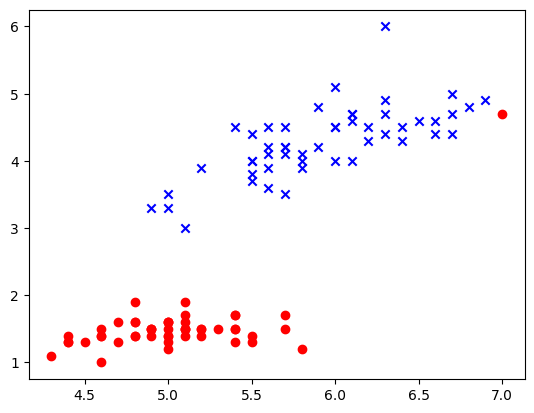

In [32]:
plt.scatter(X[:50,0],X[:50,1],
            color = 'red', marker = 'o', label ='setosa')
plt.scatter(X[50:100,0],X[50:100,1],
            color = 'blue', marker ='x',label = 'versicolor')

산점도를 통해 두 개의 특성 축을 따라 분포된 형태를 볼 수 있으며, 선형 분류기로 구분하기 쉬운 형태라는 것을 확인

In [39]:
ppn = Perceptron(eta=0.1, n_iter = 10)
ppn.fit(X,y)

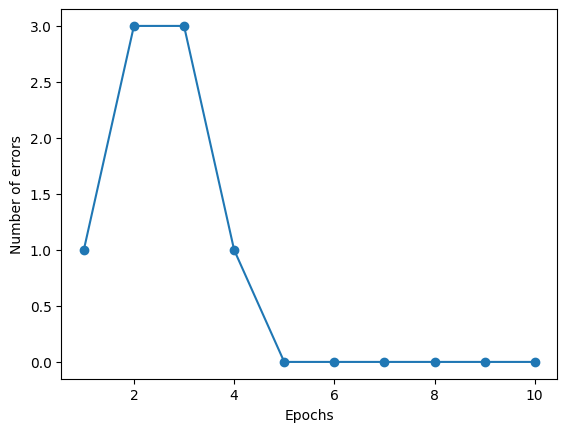

In [40]:
plt.plot(range(1,len(ppn.errors_)+1),
         ppn.errors_,marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()


6번 째 이후로는 에러 없이 완벽하게 분류해냄